In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

matches = pd.read_csv(r"C:\Users\ridds\Desktop\matches.csv")
delivery = pd.read_csv(r"C:\Users\ridds\Desktop\deliveries.csv")


 



In [35]:
matches_new = matches.rename(columns = {'id':'match_id'}, inplace = True)
merge_df =matches.merge(delivery,on='match_id')
sum_year = merge_df.groupby('season')[['total_runs']].sum()
print(sum_year)

        total_runs
season            
2008         17937
2009         16353
2010         18883
2011         21154
2012         22453
2013         22602
2014         18931
2015         18353
2016         18862
2017         18786
2018         20706
2019         20270


In [36]:
#17) number of toss wins by each team
number_of_toss_wins = matches['toss_winner'].value_counts()
print("Number of Tosses Won by Each Team:")
print(number_of_toss_wins)

Number of Tosses Won by Each Team:
toss_winner
Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: count, dtype: int64


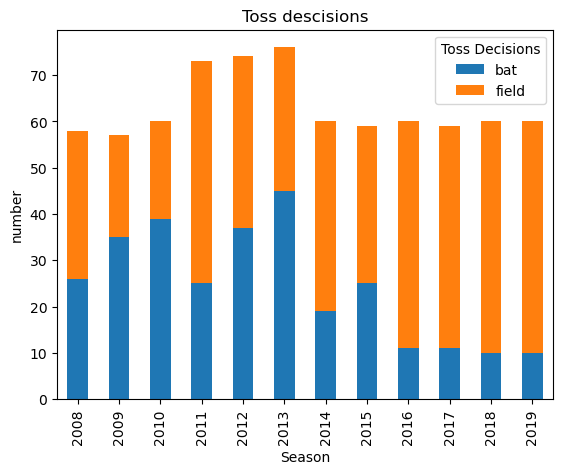

In [37]:
# 18) Visualize the Toss decision across seasons
toss_decision_season = matches.groupby('season')['toss_decision'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Season')
plt.ylabel('number')
plt.title('Toss descisions')
plt.legend(title='Toss Decisions')
plt.show()

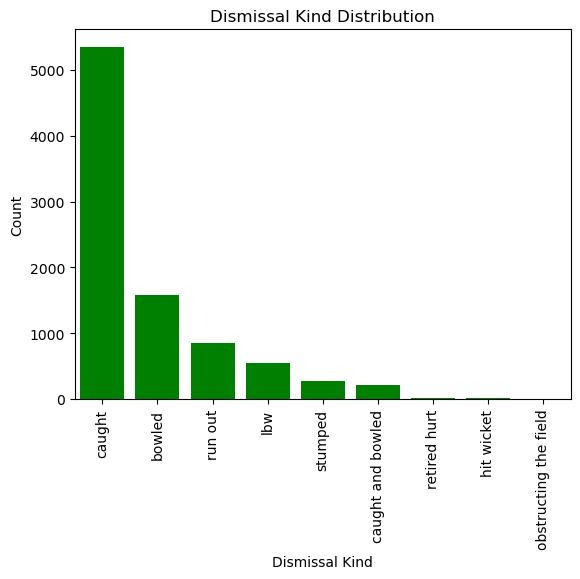

In [38]:
# 19) Find the Dismissal Kind and Visualize using a best-fit graph
dismissal_counts = delivery['dismissal_kind'].value_counts()
dismissal_counts.plot(kind='bar')
plt.bar(dismissal_counts.index, dismissal_counts.values, color='green')
plt.xlabel('Dismissal Kind')
plt.ylabel('Count')
plt.title('Dismissal Kind Distribution')
plt.show()


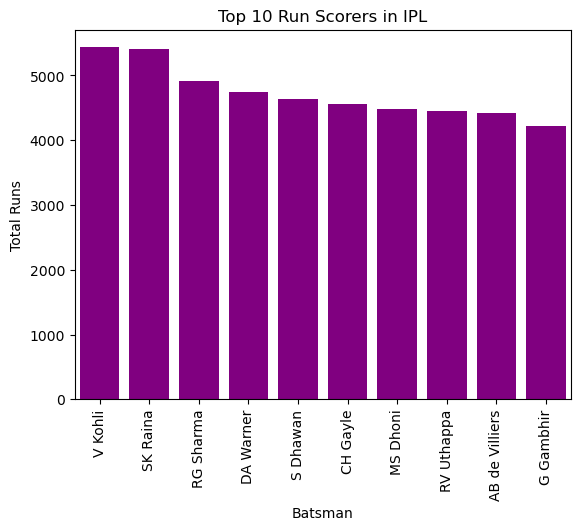

In [39]:
# 20) Find the Top 10 run scorers in IPL and Visualize using a best-fit graph
top_scorers = delivery.groupby('batsman')['batsman_runs'].sum().nlargest(10)
top_scorers.plot(kind='bar')
plt.bar(top_scorers.index, top_scorers.values, color='purple')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.title('Top 10 Run Scorers in IPL')
plt.show()

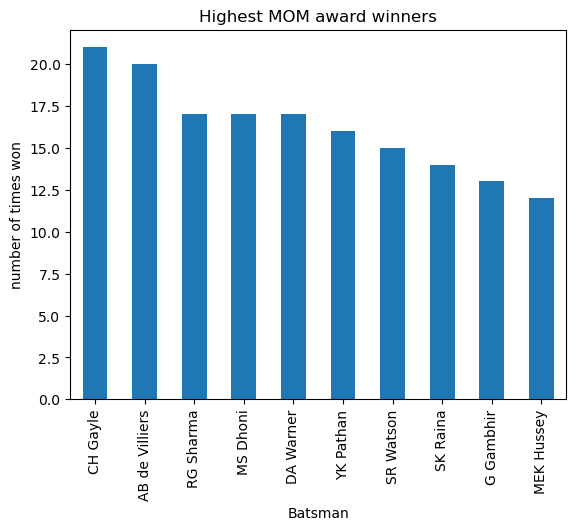

In [40]:
#21) Visualize the Highest MOM award winners
MOM = matches['player_of_match'].value_counts().nlargest(10)
MOM.plot(kind='bar')
plt.xlabel('Batsman')
plt.ylabel('number of times won')
plt.title('Highest MOM award winners')
plt.show()


In [41]:
 
# 22) Find Total Number of Played delivery by each team
total_delivery_played = matches['team1'].value_counts()+matches['team2'].value_counts()
print("Total delivery played by each team:\n", total_delivery_played)
print("\n")

Total delivery played by each team:
 Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
Name: count, dtype: int64




In [42]:
# 23) Compare Total Played delivery vs Winning delivery vs Win Rate
delivery_played_by_team = matches['team1'].value_counts()+matches['team2'].value_counts()
#delivery_played_by_team = matches['team1'].value_counts()+matches['team2'].value_counts()
print("Total Played delivery vs Winning delivery vs Win Rate\n",delivery_played_by_team)


Total Played delivery vs Winning delivery vs Win Rate
 Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
Name: count, dtype: int64


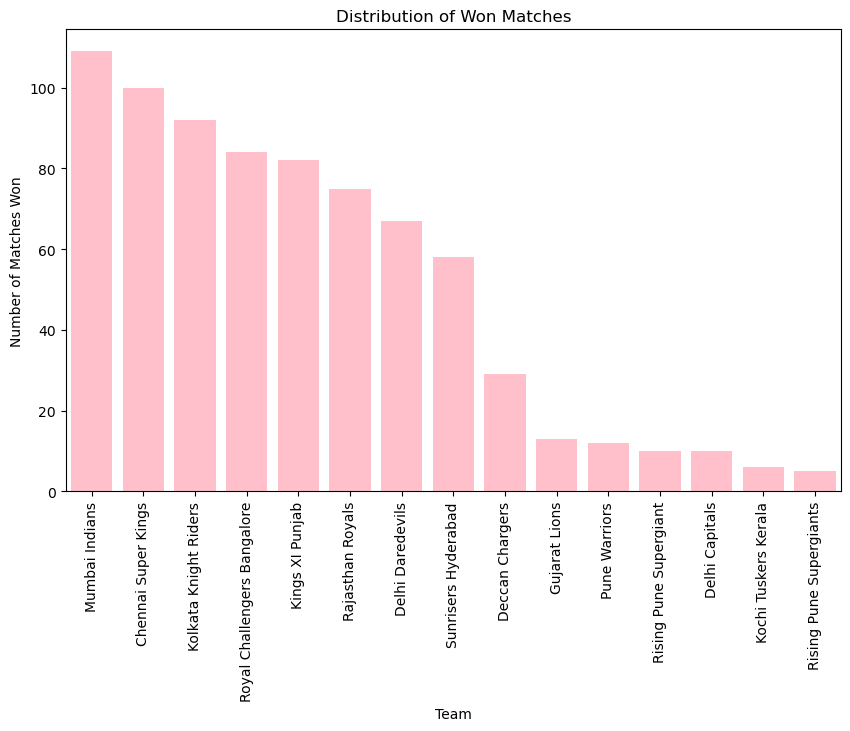

In [18]:
# Question 24: Find the Distribution of Won the Matches
number_of_matches_won = matches['winner'].value_counts()
plt.figure(figsize=(10, 6))
number_of_matches_won.plot(kind='bar')
plt.bar(number_of_matches_won.index, number_of_matches_won.values, color='pink')
plt.title("Distribution of Won Matches")
plt.xlabel("Team")
plt.ylabel("Number of Matches Won")
plt.xticks(rotation=90)
plt.show()

In [4]:
#Question 25: Ratio between Total Matches and Win Matches
total_matches = len(matches)
win_matches = len(matches.dropna(subset=['winner']))
win_ratio = win_matches / total_matches
print("Ratio between Total Matches and Win Matches:", win_ratio)

Ratio between Total Matches and Win Matches: 0.9947089947089947


In [5]:
# Question 26: What is the choice of each team after winning the toss?
toss_win_choice = matches[matches['toss_winner'] == matches['winner']]
print("Choice of each team after winning the toss:")
print(toss_win_choice[['toss_winner', 'toss_decision']])
plt.show()


Choice of each team after winning the toss:
                     toss_winner toss_decision
1         Rising Pune Supergiant         field
2          Kolkata Knight Riders         field
3                Kings XI Punjab         field
4    Royal Challengers Bangalore           bat
5            Sunrisers Hyderabad         field
..                           ...           ...
750              Kings XI Punjab         field
751               Mumbai Indians         field
753               Delhi Capitals         field
754          Chennai Super Kings         field
755               Mumbai Indians           bat

[393 rows x 2 columns]


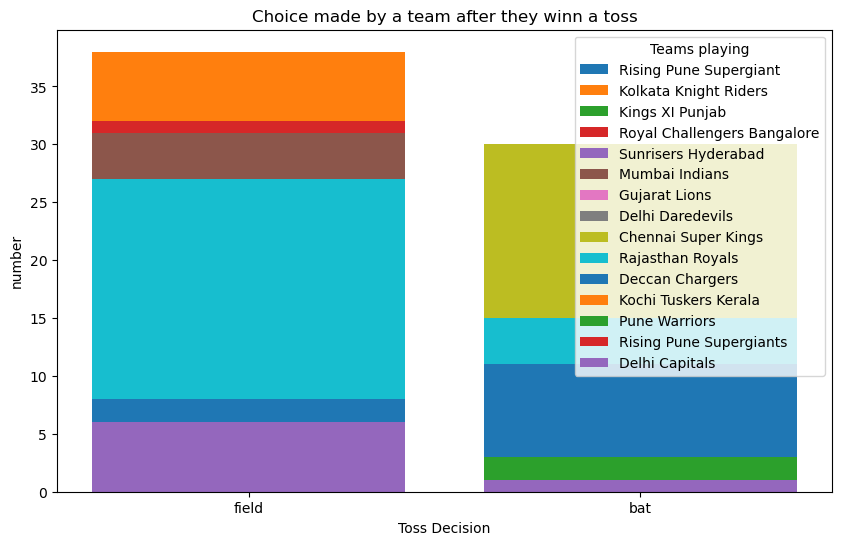

In [16]:
# Question 26: What is the choice of each team after winning the toss?
toss_win = matches[matches['toss_winner'] == matches['winner']]

toss_choices = toss_win['toss_decision'].value_counts()
teams = toss_win['toss_winner'].unique()

plt.figure(figsize=(10, 6))
for a in teams:
    team_choice = toss_win[toss_win['toss_winner'] == a]
    choices = team_choice['toss_decision'].value_counts()
    plt.bar(choices.index, choices.values, label=a)

plt.title("Choice made by a team after they winn a toss")
plt.xlabel("Toss Decision")
plt.ylabel("number")
plt.legend(title="Teams playing")
plt.show()